In [1]:
import numpy as np
from engine import Blotto
from agent_blotto import IndQLearningAgent, DummyAgent, FPLearningAgent
%matplotlib inline
import matplotlib.pyplot as plt

# Test Q-learner

In [24]:
N_EXP = 10

r0ss = []
r1ss = []
r2ss = []

In [25]:
for n in range(N_EXP):

    batch_size = 1
    gamma = 0.96


    env = Blotto(max_steps=1)

    action_space = np.array([[2,0,0], [1,1,0], [1,0,1], [0,2,0], [0,1,1], [0,0,2]])
    enemy_action_space = np.array([[0,1,0], [1,0,0], [0,0,1]])
    
    A0 = IndQLearningAgent(action_space, n_states=1, 
                      learning_rate=0.1, epsilon=0.2, gamma=0.96)
    #
    A1 = DummyAgent(enemy_action_space)
    #
    A2 = DummyAgent(enemy_action_space)

    
    # Stateless interactions (agents do not have memory)
    s = 0


    n_iter = 1000

    r0s = []
    r1s = []
    r2s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a0 = A0.act()
            a1 = A1.act()
            a2 = A2.act()

            # World changes
            _, rewards, done = env.step([a0,a1, a2])

            # Agents learn

            A0.update(0, [a0,a1,a2], rewards, 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])
            r2s.append(rewards[2])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
    r2ss.append(r2s)

/home/roi/Desktop/ARAMARL/engine.py:283: RuntimeWarning: invalid value encountered in true_divide
  z_new = z/z.sum(axis=0)


0
1
2
3
4
5
6
7
8
9


In [26]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

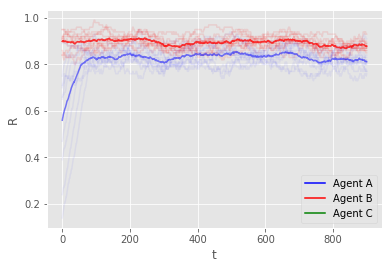

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

#plt.axis([0, 1*n_iter, -4.5, 1.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    plt.plot(moving_average(r1ss[i], 100), 'r', alpha=0.05)
    plt.plot(moving_average(r2ss[i], 100), 'r', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=0.5)
plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'r', alpha=0.5)
plt.plot(moving_average(np.asarray(r2ss).mean(axis=0), 100), 'r', alpha=0.5)

plt.xlabel('t');
plt.ylabel('R');

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='b'),
                Line2D([0], [0], color='r'),
                Line2D([0], [0], color='g')]

plt.legend(custom_lines,['Agent A', 'Agent B', 'Agent C']);

# Test FPQ-learner

In [21]:
N_EXP = 10

r0ss = []
r1ss = []
r2ss = []

In [22]:
for n in range(N_EXP):

    batch_size = 1
    gamma = 0.96


    env = Blotto(max_steps=1)

    action_space = np.array([[2,0,0], [1,1,0], [1,0,1], [0,2,0], [0,1,1], [0,0,2]])
    enemy_action_space = np.array([[0,1,0], [1,0,0], [0,0,1]])
    
    A0 = FPLearningAgent(action_space, enemy_action_space, enemy_action_space, n_states=1,
                      learning_rate=0.1, epsilon=0.2, gamma=0.96)
    #
    A1 = DummyAgent(enemy_action_space)
    #
    A2 = DummyAgent(enemy_action_space)

    
    # Stateless interactions (agents do not have memory)
    s = 0


    n_iter = 1000

    r0s = []
    r1s = []
    r2s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a0 = A0.act()
            a1 = A1.act()
            a2 = A2.act()

            # World changes
            _, rewards, done = env.step([a0,a1, a2])

            # Agents learn

            A0.update(0, [a0,a1,a2], rewards, 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])
            r2s.append(rewards[2])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
    r2ss.append(r2s)

/home/roi/Desktop/ARAMARL/engine.py:283: RuntimeWarning: invalid value encountered in true_divide
  z_new = z/z.sum(axis=0)


0
1
2
3
4
5
6
7
8
9


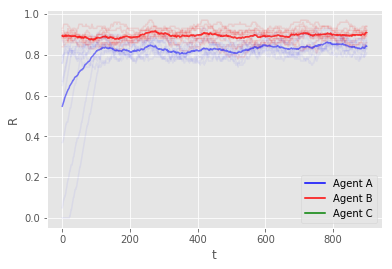

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

#plt.axis([0, 1*n_iter, -4.5, 1.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    plt.plot(moving_average(r1ss[i], 100), 'r', alpha=0.05)
    plt.plot(moving_average(r2ss[i], 100), 'r', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=0.5)
plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'r', alpha=0.5)
plt.plot(moving_average(np.asarray(r2ss).mean(axis=0), 100), 'r', alpha=0.5)

plt.xlabel('t');
plt.ylabel('R');

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='b'),
                Line2D([0], [0], color='r'),
                Line2D([0], [0], color='g')]

plt.legend(custom_lines,['Agent A', 'Agent B', 'Agent C']);